In [1]:
import pandas as pd
df=pd.read_csv('Titanic_train.csv')
df

print('number of rows and columns',df.shape)
df.head()

number of rows and columns (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [131]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [2]:
# 'Age' ,Cabin and Embarked has null elemts 
# age --> null --> mean
# cabin-->null -->0
# cabin-->null -->0
df['Age'].fillna(df['Age'].mean(),inplace=True)
# df['Cabin'].fillna(df['Cabin'].mode(),inplace=True)

# # replace null with 'a' because the cabin having object data-type
# df['Cabin'].fillna('',inplace=True)

# # df['Embarked'].fillna(df['Embarked'].mode(),inplace=True)
# # replace null with 'a' because the embraked having object data-type
# df['Embarked'].fillna('',inplace=True)
print('Number of Null Values ',df.isnull().sum())
df.dtypes

Number of Null Values  PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<Axes: >

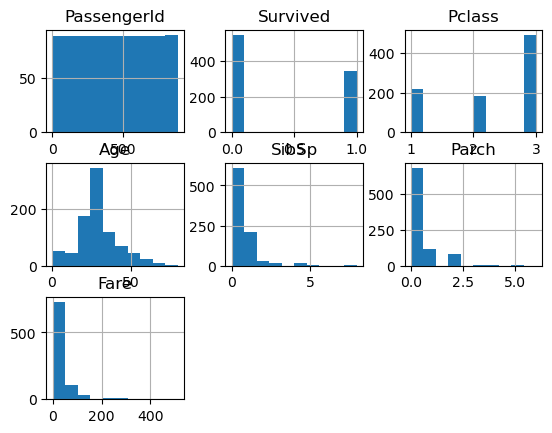

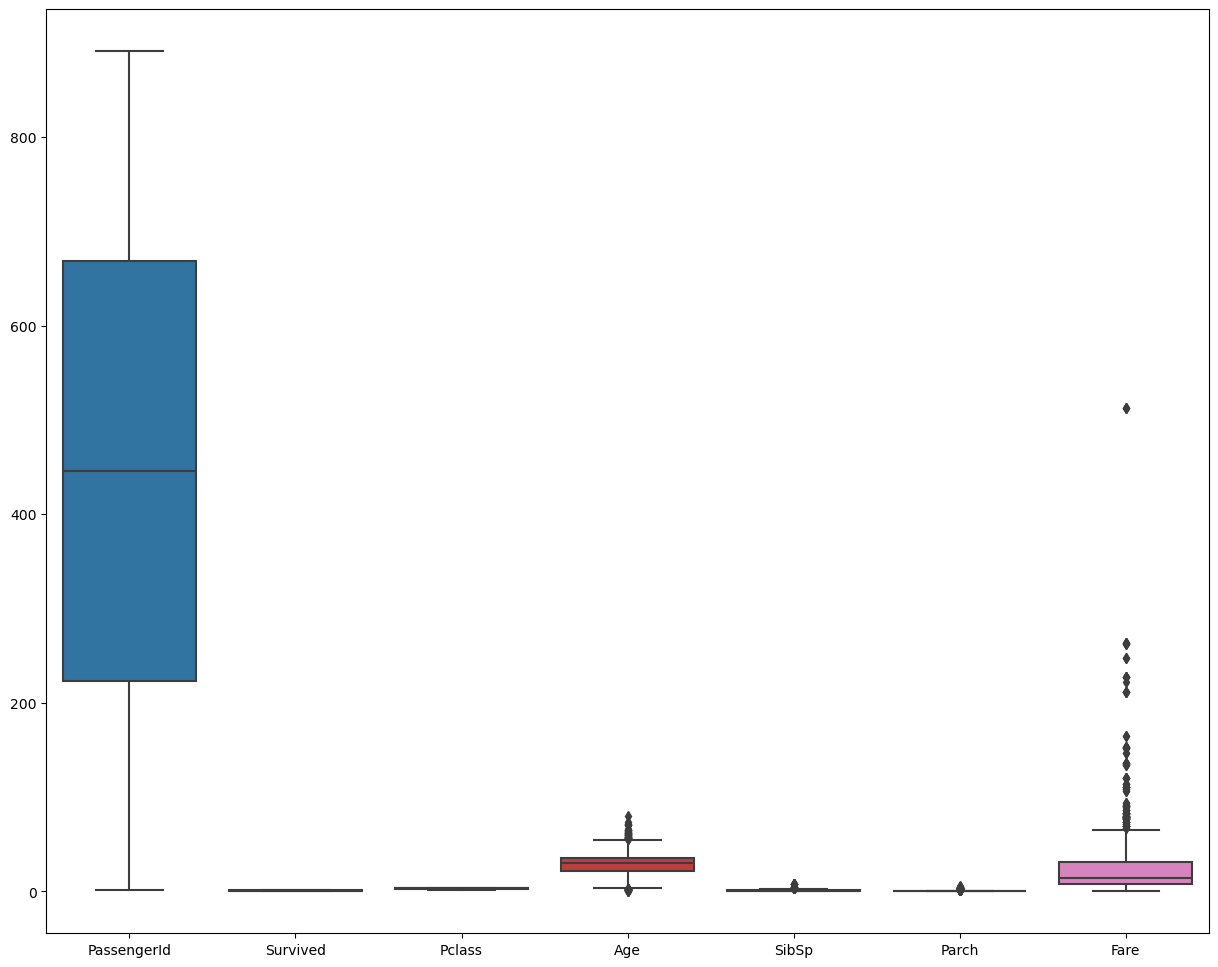

In [173]:
import matplotlib.pyplot as plt
df.hist()
import seaborn as sns
fig,ax=plt.subplots(figsize=(15,12))
sns.boxplot(df,ax=ax)


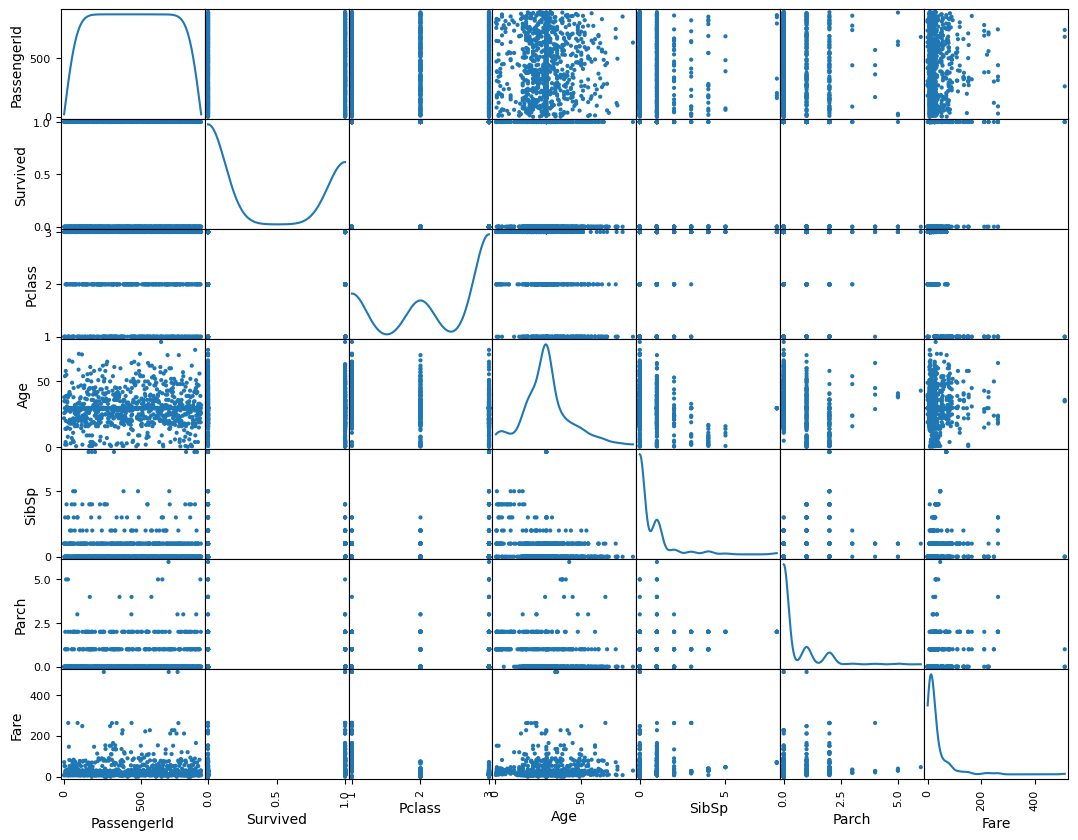

In [92]:
# pair plots

import seaborn as sns
import matplotlib.pyplot as plt
# sns.pairplot(df)
# plt.show()
# aplha : Transparency
pd.plotting.scatter_matrix(df, alpha=1, figsize=(13, 10), diagonal='kde')
plt.show()


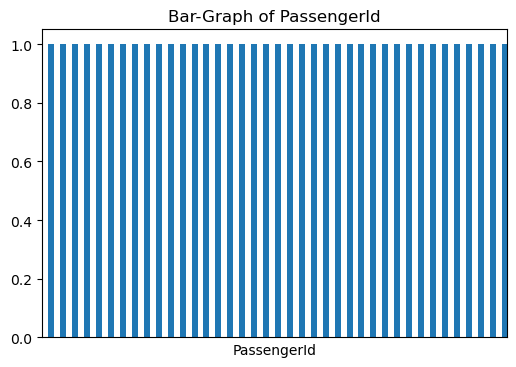

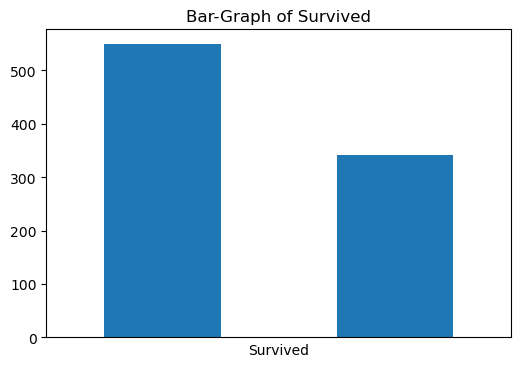

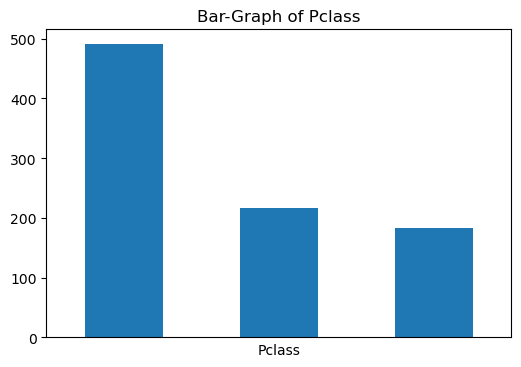

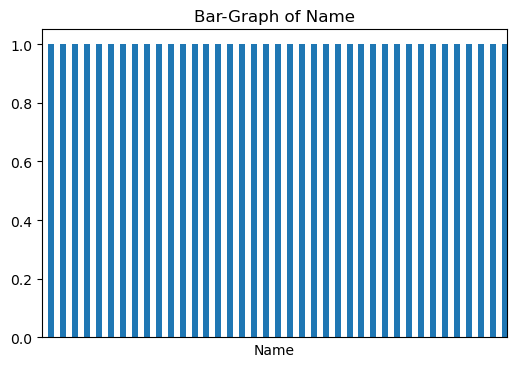

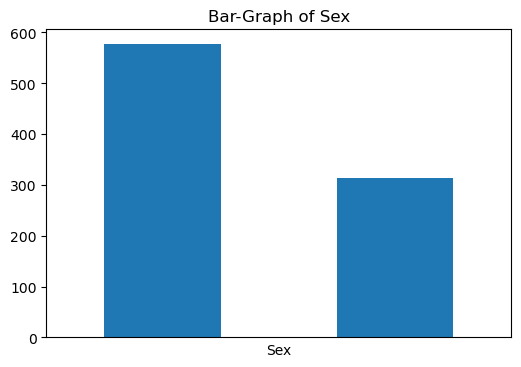

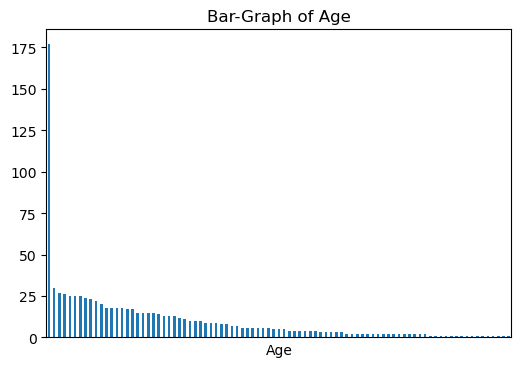

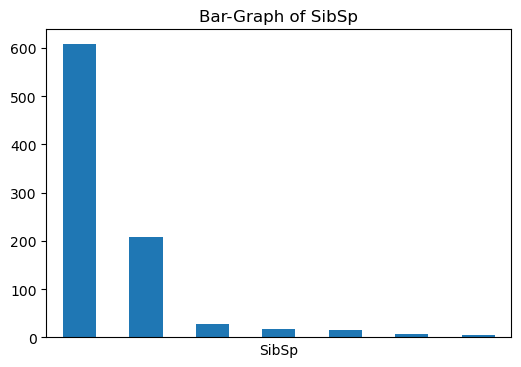

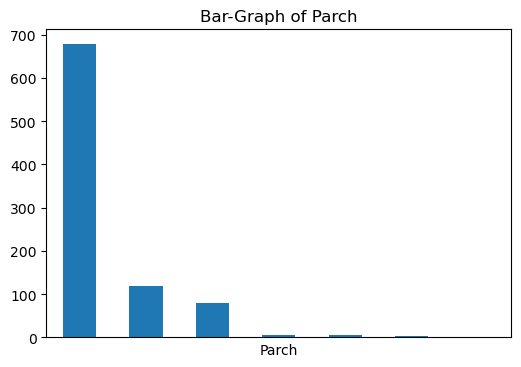

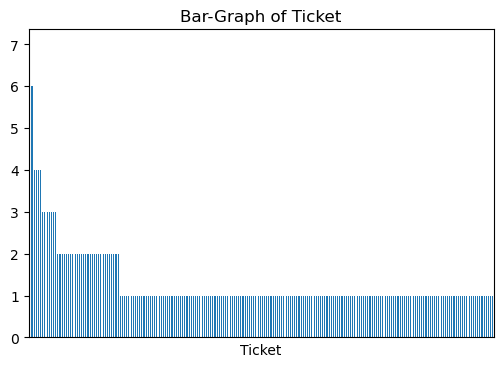

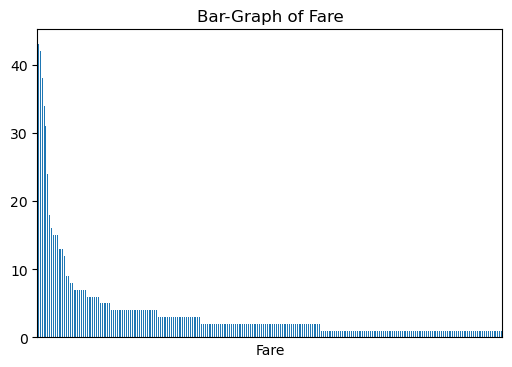

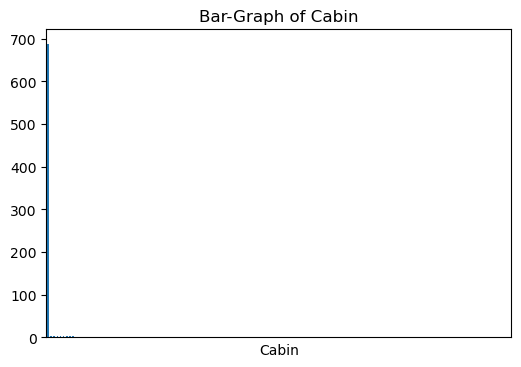

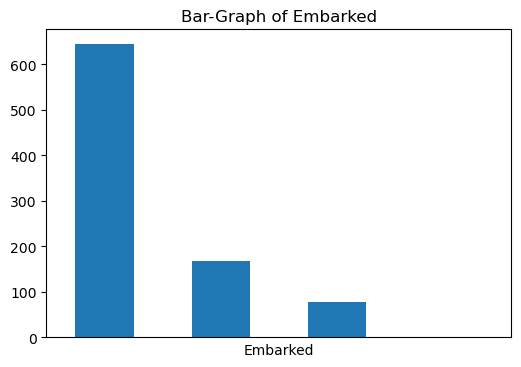

In [124]:
# Bar-Graph

import seaborn as sns
for i in df:
    # plot dimension are 15X7
    plt.figure(figsize=(6,4))
    # counting the individual element how many times it is repeating and ploting 
    # sns.distplot(df[i])
    # `distplot` is a deprecated function and will be removed in seaborn v0.14.0.
    df[i].value_counts().plot(kind='bar')
    plt.title(f'Bar-Graph of {i}')
    # Hide x-axis labels
    plt.xticks([])
    plt.show()
    

In [115]:
import matplotlib.pyplot as plt


In [3]:
# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# mn=df.types[df.dtypes='object'].index
# list(mn)
mn=df.dtypes
# if the columns is matches with 'object' that mean's it is a categorical column
# taking that index value and assign to ss
ss=mn[mn =='object'].index 
ss
# the ss data in object formate so convert into list

for i in ss:
    df[i]=le.fit_transform(df[i])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.000000,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.000000,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.000000,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.000000,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.000000,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.000000,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.000000,0,0,14,30.0000,30,2
888,889,0,3,413,0,29.699118,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.000000,0,0,8,30.0000,60,0


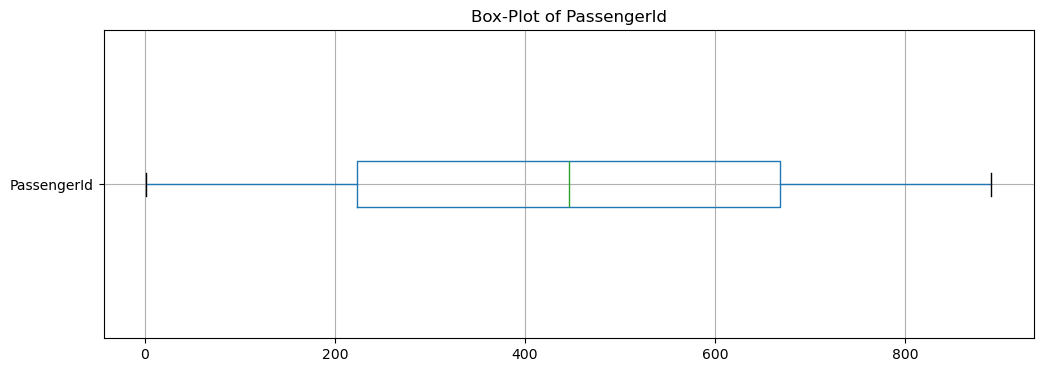

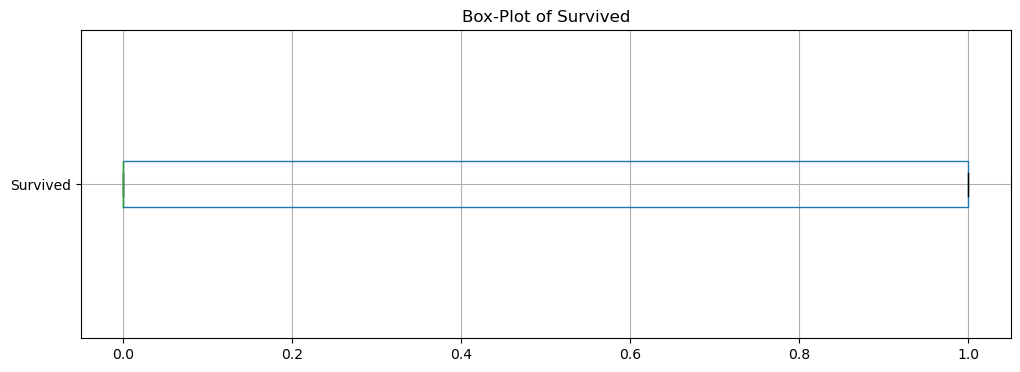

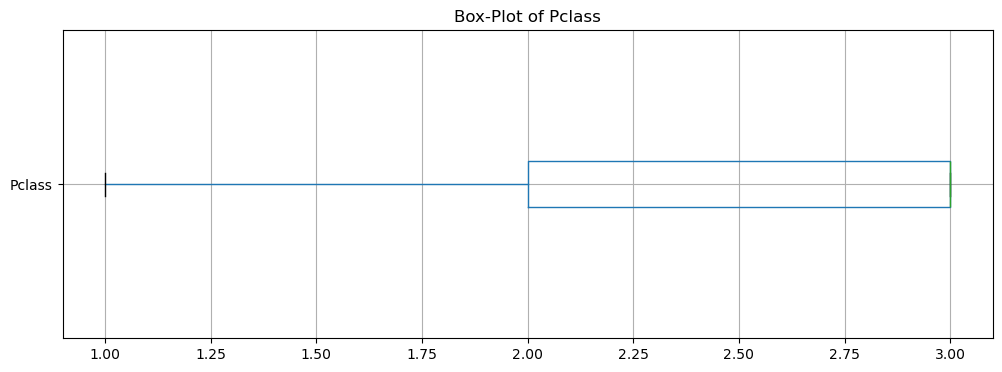

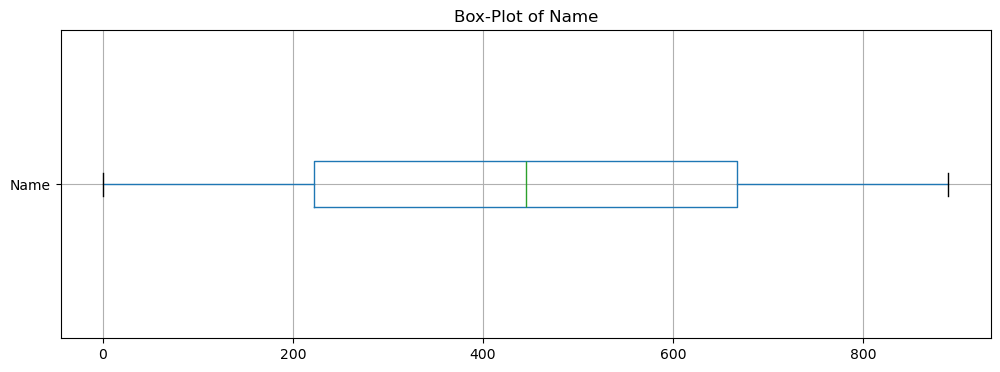

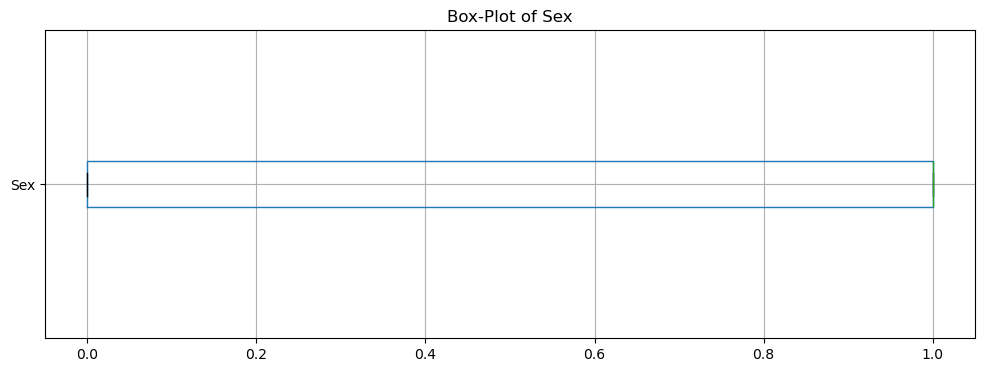

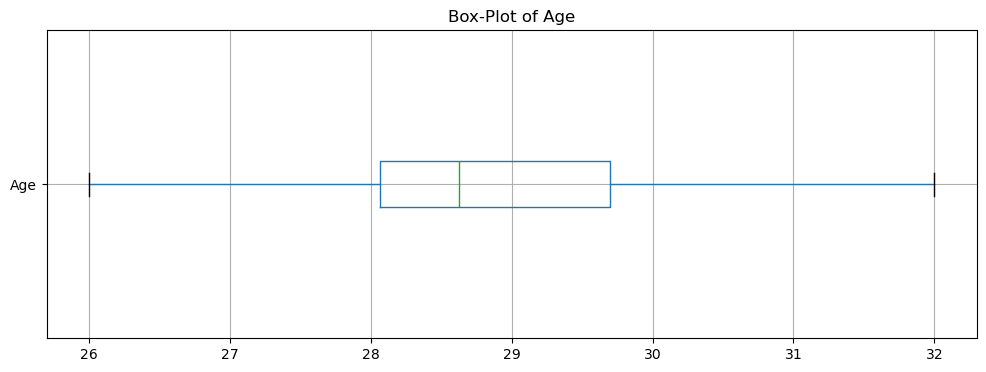

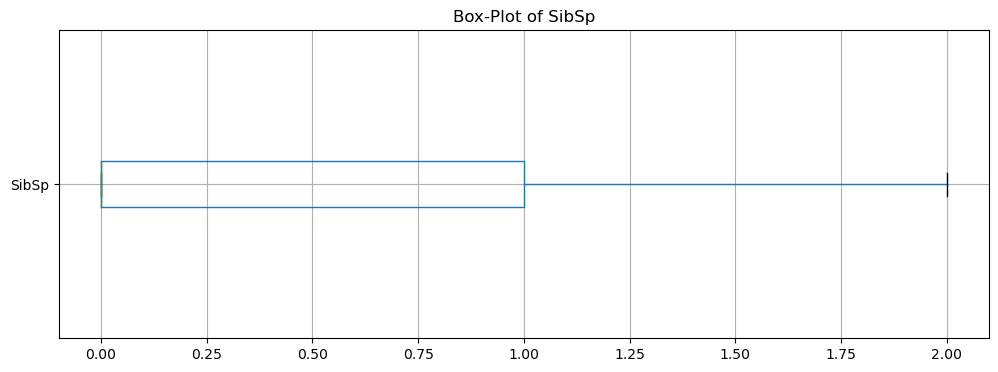

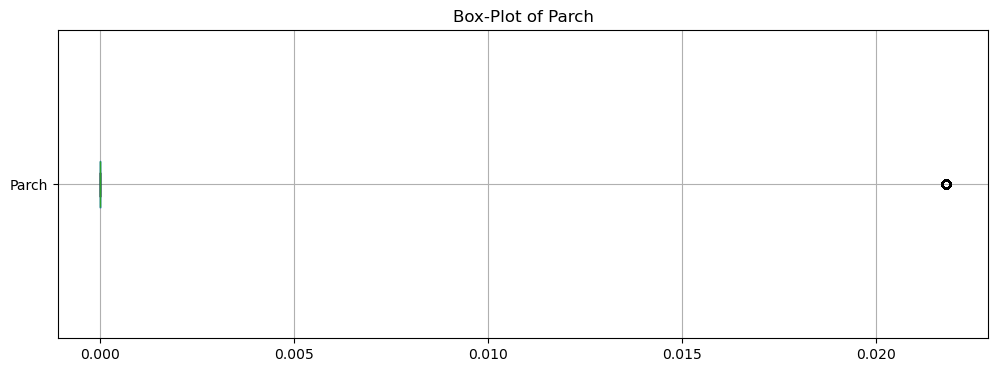

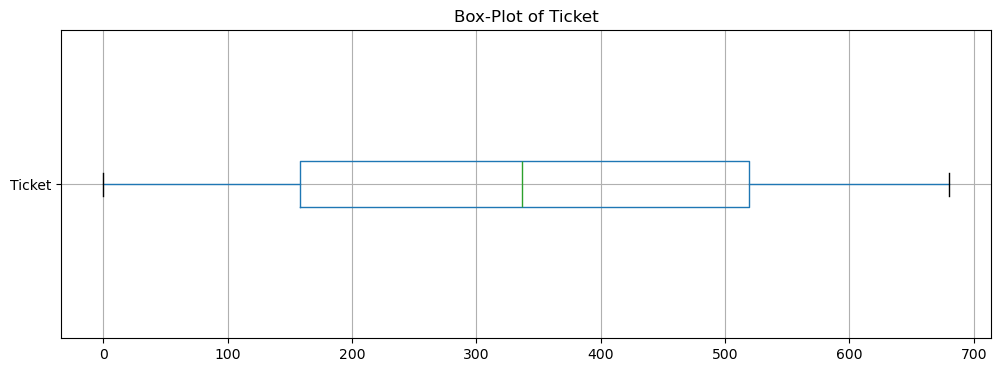

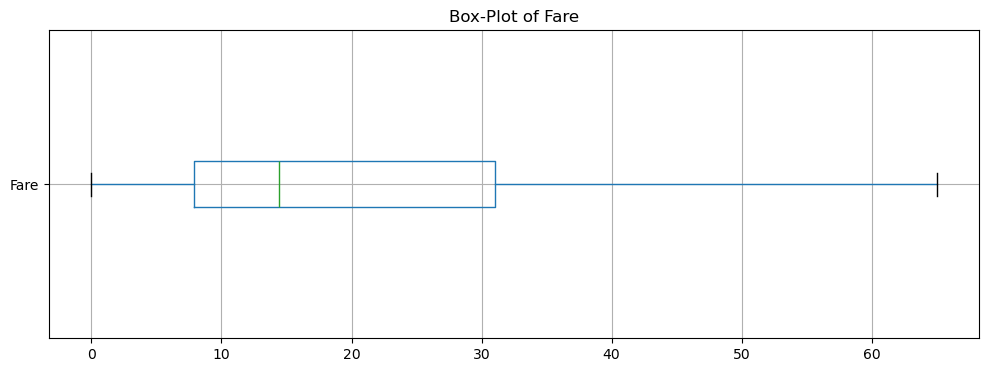

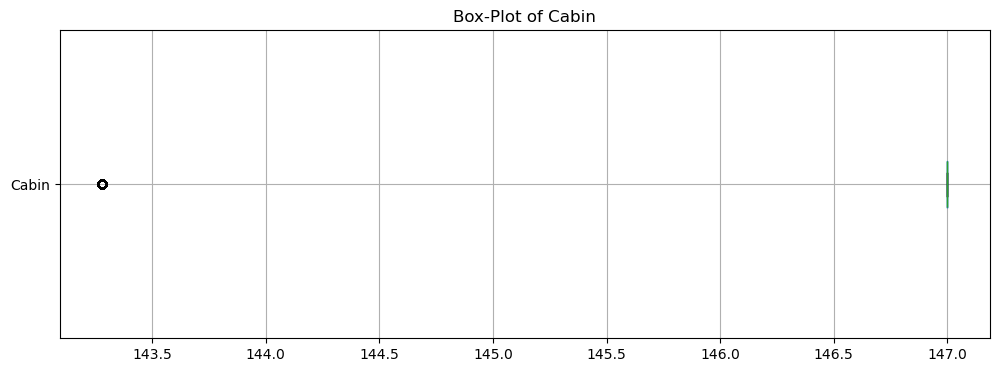

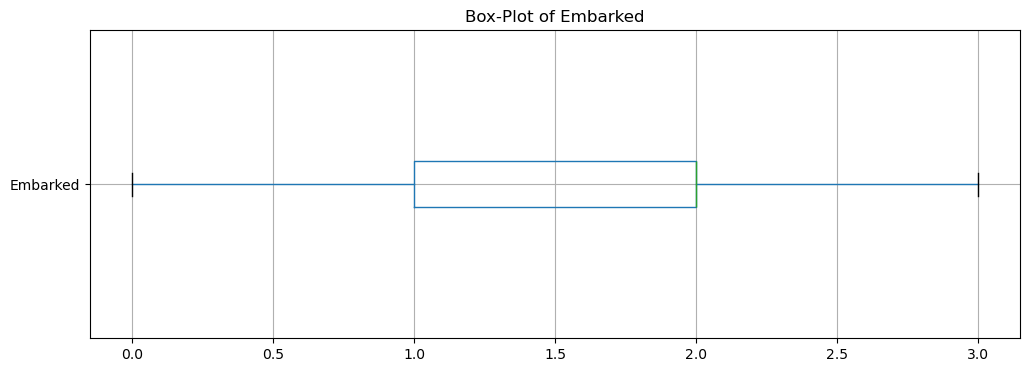

In [154]:
for i in df:
    # taking ploting dimension as 12x4
    plt.figure(figsize=(12,4))
    # visualizating box-plot taking vert as False mean's printing in horizantial direction
    df.boxplot(column=i,vert=False)
    plt.title(f'Box-Plot of {i}')
    plt.show()

In [5]:
# outlier--->age,fare
# check---cabin,parch,sibsp

import numpy as np
kk=['Age','Fare','SibSp','Parch','Cabin']
for i in kk:
    # Calculate quartiles
    Q1 = np.percentile(df[i], 25)
    Q3 = np.percentile(df[i], 75)
    # Calculate IQR
    IQR = Q3 - Q1
    # Define upper and lower whisker lengths
    upper_whisker = Q3 + 1.5 * IQR
    lower_whisker = Q1 - 1.5 * IQR
    # finding mean 
    mean = df[i].mean()
    # Identify outliers and replace them with mean
    df.loc[df[i]<lower_whisker,i]=mean 
    df.loc[df[i]>upper_whisker,i]=mean
    # replace nun values with mean
    df.fillna(mean, inplace=True)



In [6]:
df.corr()
# Pclass,Age,SibSp,Parch,Embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.003193,-0.041998,0.005167,-0.056554,0.003285,-0.019919,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,0.009168,0.136609,0.147408,-0.164549,0.283273,-0.316912,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.169695,-0.095322,-0.027526,0.319869,-0.640577,0.725541,0.157112
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.016431,-0.099249,-0.045107,0.047348,-0.082299,0.033960,-0.004557
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.033520,-0.186191,-0.247523,0.059372,-0.186195,0.140391,0.104057
Age,0.003193,0.009168,-0.169695,0.016431,0.033520,1.000000,0.006162,-0.004827,-0.032318,0.109815,-0.114576,0.016709
SibSp,-0.041998,0.136609,-0.095322,-0.099249,-0.186191,0.006162,1.000000,0.324174,-0.010499,0.350696,-0.084377,-0.042939
Parch,0.005167,0.147408,-0.027526,-0.045107,-0.247523,-0.004827,0.324174,1.000000,-0.006982,0.359592,-0.089136,0.000837
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.032318,-0.010499,-0.006982,1.000000,-0.215222,0.249303,-0.006041
Fare,0.003285,0.283273,-0.640577,-0.082299,-0.186195,0.109815,0.350696,0.359592,-0.215222,1.000000,-0.515056,-0.116041


C:\Users\jalli\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


     PassengerId  Survived  Pclass  Name  Sex        Age  SibSp     Parch  \
0              1         0       3   108    1  22.000000    1.0  0.000000   
1              2         1       1   190    0  38.000000    1.0  0.000000   
2              3         1       3   353    0  26.000000    0.0  0.000000   
3              4         1       1   272    0  35.000000    1.0  0.000000   
4              5         0       3    15    1  35.000000    0.0  0.000000   
..           ...       ...     ...   ...  ...        ...    ...       ...   
886          887         0       2   548    1  27.000000    0.0  0.000000   
887          888         1       1   303    0  19.000000    0.0  0.000000   
888          889         0       3   413    0  29.699118    1.0  0.091223   
889          890         1       1    81    1  26.000000    0.0  0.000000   
890          891         0       3   220    1  32.000000    0.0  0.000000   

     Ticket       Fare       Cabin  Embarked  Y_probability  
0       523  

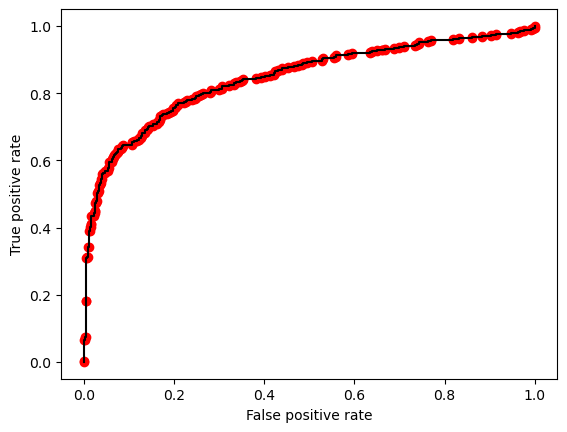

Area under curve 0.845
Cinfusion matrix is : [[467  82]
 [102 240]]
Accuray Score :  0.79


In [7]:
# Build a logistic regression model

import numpy as np
Y=df['Survived']
# X=df.drop(df.columns[1],axis=1,inplace=True)
X=pd.concat([df['PassengerId'],df.iloc[:,2:12]],axis=1)
# X.columns(df.columns[[0,2,3,4,5,6,7,8,9,10,11]])

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X,Y)
y_pred=lr.predict(X)

ss=lr.predict_proba(X)
df['Y_probability']=ss[:,1]
print(df)
from sklearn.metrics import confusion_matrix,accuracy_score

cm=confusion_matrix(Y,y_pred)

ac=accuracy_score(Y,y_pred)
print('Accuracy score : ',round(ac,2))


# ROC curvev

from sklearn.metrics import roc_curve,roc_auc_score
FPR,TPR,dummy=roc_curve(Y,df['Y_probability'])
import matplotlib.pyplot as plt
plt.scatter(FPR,TPR,color='red')
plt.plot(FPR,TPR,color='Black')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()


print("Area under curve",roc_auc_score(Y,df["Y_probability"]).round(3))
      
      # Accuray score
from sklearn.metrics import confusion_matrix,accuracy_score

cm=confusion_matrix(Y, y_pred)

print('Cinfusion matrix is :',cm)

accu_score=accuracy_score(Y, y_pred)
print('Accuray Score : ',round(accu_score,2))
# this Accuracy score falls under 0.7-0.8 region mean's this model is fair we have to imporve some

In [218]:
# Interpret the coefficients of the logistic regression model.


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# lr=LogisticRegression()
# X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=499)


# lr.fit(X_train,Y_train)

# print('coefficent of training samples : ',lr.coef_)
# print('Bias or Intercept : ',lr.intercept_)
# df_coef=pd.concat([pd.DataFrame(list(X)),pd.DataFrame(lr.coef_)],axis=1)
# df_coef.columns=['','Coefficients']
# from sklearn.linear_model import Ridge
# RR=Ridge(alpha=29)
# RR.fit(X_train,Y_train)
# RR.coef_
# df_coef['RR_coef']=RR.coef_
# print(df_coef)

# from sklearn.metrics import mean_squared_error
# training_loss = []
# test_loss = []

# for i in range(0,500,1):
#     X_train,X_test,Y_train,Y_test  = train_test_split(X,Y,test_size = 0.3,random_state=i)
#     lr.fit(X_train,Y_train)
#     y_pred_train = lr.predict(X_train)
#     y_pred_test = lr.predict(X_test)
#     training_loss.append(np.sqrt(mean_squared_error(Y_train,y_pred_train)))
#     test_loss.append(np.sqrt(mean_squared_error(Y_test,y_pred_test)))

# import numpy as np
# print("CV- Training  loss: ",np.mean(training_loss).round(2))
# print("CV- Test loss: ",np.mean(test_loss).round(2))

# we got training and test loss are lessn it is better to have mini training loss



lr = LogisticRegression()
lr.fit(X, Y)
intercept = lr.intercept_
coefficients = lr.coef_

# Print the logistic regression equation
equation = f"logit(p) = {intercept[0]} "
for i, feature in enumerate(X):
    equation += f" + {coefficients[0][i]} * {feature}"
print("Logistic Regression Equation:")
print(equation)

Logistic Regression Equation:
logit(p) = 0.017271148778161667  + 4.7289639770887344e-05 * PassengerId + -0.8880510413569368 * Pclass + -0.00036120539082897776 * Name + -2.475494611291051 * Sex + -0.008006868659534535 * Age + 0.21761601658732188 * SibSp + 0.028096170909175138 * Parch + -0.0008664856789555939 * Ticket + 0.0016184229537900892 * Fare + 0.02713703292795628 * Cabin + -0.267483422009394 * Embarked


C:\Users\jalli\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
